In [1]:
import os
import sys
import pandas as pd

In [2]:
# create generic path using so that the code can run in both windows and linux systems
raw_data_path = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,'data','raw'))

In [3]:
# Loading data into dataframe
df = pd.read_csv(os.path.abspath(os.path.join(raw_data_path,'train.csv')))

In [4]:
# having a look at data
df.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


**Insights:**
1. 'target' is the target variable. to calculate target, the remaining columns except comment_text looks helpful.
    Hence we need to see the features which are important for target calculation, and have to figure out ways to 
    calculate these features first.
2. Comment_text contains invalid characters like \n, so there is some cleaning is to be done.
3. ID is not providing any useful info. so it is to be dropped.

In [5]:
# List down all columns in the data
df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [6]:
toxicity_cols = ['severe_toxicity', 'obscene', 'insult', 'threat','sexual_explicit']

In [7]:
race_cols = ['asian','black','white','white','latino','other_race_or_ethnicity','identity_attack']

In [8]:
religion_cols = ['atheist','buddhist', 'christian','hindu','jewish','muslim', 'other_religion']

In [9]:
gender_cos = ['male','female','bisexual','transgender','homosexual_gay_or_lesbian', 'heterosexual', 'other_sexual_orientation']

In [10]:
disability_cols = ['intellectual_or_learning_disability','other_disability','physical_disability','psychiatric_or_mental_illness']

In [11]:
feelings_cols = ['funny', 'wow', 'sad', 'likes', 'disagree']

In [12]:
PACKAGE_PATH =  os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,os.path.pardir,
                'Common_Functions','EDA'))
sys.path.insert(1, PACKAGE_PATH)

In [13]:
from class_imbalance import find_imbalance_class

classes and target in toxicity_cols


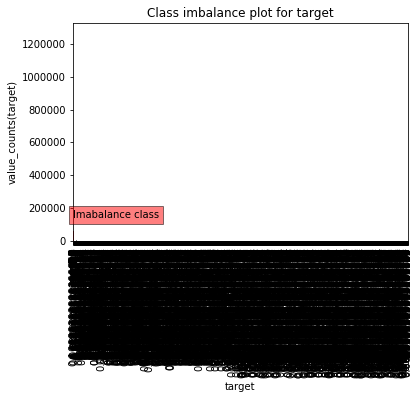

In [14]:
print('classes and target in toxicity_cols')
find_imbalance_class(df[['comment_text','target']],'target')

In [ ]:
df.plot(kind='bar',x='target',y='severe_toxicity')